# 🚧 In Early Development

# Chicago Crimes (2001 to Present)
A CO³ Labs study by Christian Olivares-Rodriguez

The following data is directly from the City of Chicago with the latest update at the time of this project being 9/1/25



The dataset can be found in the following link: https://data.cityofchicago.org/d/ijzp-q8t2

## 📊 Dataset Features

The dataset contains **22 features**:

- **ID**: Unique identifier for the record.  
- **Case Number**: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.  
- **Date**: Date when the incident occurred (sometimes a best estimate).  
- **Block**: The partially redacted address where the incident occurred, placing it on the same block as the actual address.  
- **IUCR**: The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description.  
  - 🔗 [List of IUCR codes](https://data.cityofchicago.org/d/c7ck-438e)  
- **Primary Type**: The primary description of the IUCR code.  
- **Description**: The secondary description of the IUCR code, a subcategory of the primary description.  
- **Location Description**: Description of the location where the incident occurred.  
- **Arrest**: Indicates whether an arrest was made.  
- **Domestic**: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.  
- **Beat**: The beat where the incident occurred. A beat is the smallest police geographic area, each with a dedicated police beat car.  
  - 🔗 [See Chicago beats](https://data.cityofchicago.org/d/aerh-rz74)  
- **District**: Indicates the police district where the incident occurred.  
  - 🔗 [See Chicago districts](https://data.cityofchicago.org/d/fthy-xz3r)  
- **Ward**: The ward (City Council district) where the incident occurred.  
  - 🔗 [See Chicago wards](https://data.cityofchicago.org/d/sp34-6z76)  
- **Community Area**: Indicates the community area where the incident occurred. Chicago has 77 community areas.  
  - 🔗 [See community areas](https://data.cityofchicago.org/d/cauq-8yn6)  
- **FBI Code**: Crime classification per the FBI's NIBRS system.  
  - 🔗 [FBI crime classifications](https://gis.chicagopolice.org/pages/crime_details)  
- **X Coordinate**: The X coordinate of the location (State Plane Illinois East NAD 1983). Slightly shifted for privacy.  
- **Y Coordinate**: The Y coordinate of the location (State Plane Illinois East NAD 1983). Slightly shifted for privacy.  
- **Year**: Year the incident occurred.  
- **Updated On**: Date and time the record was last updated.  
- **Latitude**: The latitude of the incident location (shifted for privacy).  
- **Longitude**: The longitude of the incident location (shifted for privacy).  
- **Location**: Combined latitude/longitude format for mapping and geographic operations.  

This project will consist of two main phases, **Analysis (Phase 1)** and **Machine learning predictions with Pytorch (Phase 2)**

<p align = "center"> 
     <a href="https://pandas.pydata.org/" target="_blank" rel="noreferrer">
        <img src="https://pandas.pydata.org/static/img/pandas_mark.svg" alt="pandas" width="40" height="40"/>
    </a>
    <a href = "https://pytorch.org/" target="_blank" rel="noreferrer">
        <img src="https://www.vectorlogo.zone/logos/pytorch/pytorch-icon.svg" alt="pytorch" width="40" height="40"/>
    </a>
</p>

### Libraries


In [57]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
# Uncomment if running in a fresh environment
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
# pip install matplotlib
import pandas as pd
import torch 
from IPython.display import display
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Importing the Data

In [59]:
# Uncomment to load full dataset
# crime_df = pd.read_csv('/Users/christianolivares/Data Sci/Projects/Python/Chicago Crimes/CSV/Crimes_-_2001_to_Present_20250901.csv')
crime_df = pd.read_csv('/Users/christianolivares/Data Sci/Projects/Python/Chicago Crimes/CSV/Crimes_-_2001_to_Present_20250901.csv', nrows = 200_000)

display(crime_df.head(5))
print(crime_df.shape)
crime_df.isnull().sum()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13944993,JJ387932,08/24/2025 12:00:00 AM,048XX W NORTH AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,37,25,04A,1143357.0,1910187.0,2025,08/31/2025 03:44:27 PM,41.909591,-87.748806,"(41.909591067, -87.748805933)"
1,13944716,JJ387574,08/24/2025 12:00:00 AM,094XX S PERRY AVE,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,ALLEY,True,False,...,9,49,18,1177273.0,1842339.0,2025,08/31/2025 03:44:27 PM,41.722708,-87.626265,"(41.722708451, -87.626264554)"
2,13944725,JJ387611,08/24/2025 12:00:00 AM,033XX S BELL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,ALLEY,False,False,...,12,59,14,1161899.0,1882457.0,2025,08/31/2025 03:44:27 PM,41.833130,-87.681464,"(41.833130457, -87.681463965)"
3,13946336,JJ388372,08/24/2025 12:00:00 AM,025XX W IRVING PARK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,47,5,14,1158560.0,1926479.0,2025,08/31/2025 03:44:27 PM,41.954000,-87.692509,"(41.953999563, -87.69250903)"
4,13948459,JJ392059,08/24/2025 12:00:00 AM,056XX S HERMITAGE AVE,0620,BURGLARY,UNLAWFUL ENTRY,ABANDONED BUILDING,False,False,...,15,67,05,1165641.0,1867263.0,2025,08/31/2025 03:44:27 PM,41.791358,-87.668165,"(41.791357661, -87.668165381)"


(200000, 22)


ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    717
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate             59
Y Coordinate             59
Year                      0
Updated On                0
Latitude                 59
Longitude                59
Location                 59
dtype: int64

# Making a Copy and Filtering the Data

In [60]:
# Copy df
crime_copy_df = crime_df.copy()

# Drop NAs, check shape, and check for any NAs
crime_clean_df = crime_copy_df.dropna()
print(crime_clean_df.shape)
print(crime_clean_df.isnull().sum())

(199224, 22)
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


After cleaning we went from 200,000 rows down to 199,224

# Phase 1
### Analysis

Let's first start off by checking all the column names and the unique crimes fromt the column Primary Type along with the amount of times they appear in the dataset

In [61]:
column_names = list(crime_clean_df.columns)

unique_primary_type = crime_clean_df['Primary Type'].unique()

print("Column Names:")
display(column_names)

print("Unique Primary Types:")
display(unique_primary_type)

crime_clean_df['Primary Type'].value_counts()

Column Names:


['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

Unique Primary Types:


array(['ASSAULT', 'NARCOTICS', 'CRIMINAL DAMAGE', 'BURGLARY', 'THEFT',
       'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'PUBLIC PEACE VIOLATION',
       'SEX OFFENSE', 'ARSON', 'CONCEALED CARRY LICENSE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'DECEPTIVE PRACTICE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'PROSTITUTION',
       'HOMICIDE', 'STALKING', 'KIDNAPPING', 'OBSCENITY',
       'HUMAN TRAFFICKING', 'LIQUOR LAW VIOLATION', 'GAMBLING',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL'],
      dtype=object)

Primary Type
THEFT                                47032
BATTERY                              35983
CRIMINAL DAMAGE                      21962
ASSAULT                              18139
MOTOR VEHICLE THEFT                  14456
OTHER OFFENSE                        14010
DECEPTIVE PRACTICE                   11447
BURGLARY                              7562
NARCOTICS                             6385
ROBBERY                               5695
WEAPONS VIOLATION                     4900
CRIMINAL TRESPASS                     4368
OFFENSE INVOLVING CHILDREN            1333
CRIMINAL SEXUAL ASSAULT               1322
SEX OFFENSE                           1050
PUBLIC PEACE VIOLATION                 849
INTERFERENCE WITH PUBLIC OFFICER       740
STALKING                               435
HOMICIDE                               358
ARSON                                  327
CONCEALED CARRY LICENSE VIOLATION      233
PROSTITUTION                           187
LIQUOR LAW VIOLATION                   16

In [ ]:
# group the amount of times a certain crime occured per year
crime_counts = crime_clean_df.groupby(["Year", "Primary Type"]).size().reset_index(name = "Count")

<Axes: title={'center': 'Crimes by Type in 2025'}, xlabel='Primary Type'>

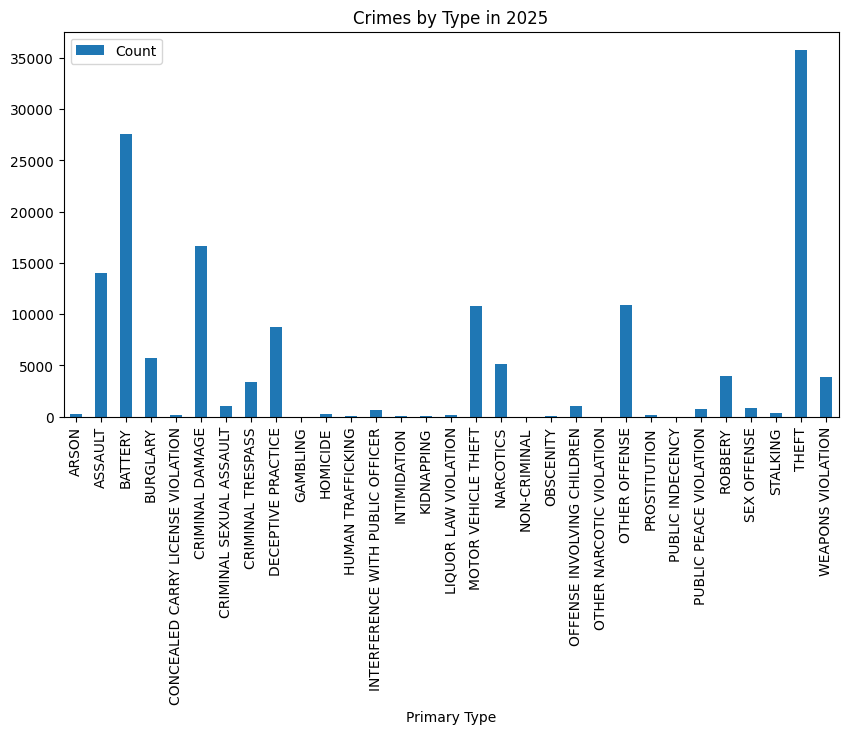

In [ ]:
# crime_clean_df.plot(x = "Year", y = "Primary Type", kind = "bar", title = "Crimes per Year")
crime_counts[crime_counts["Year"] == 2025].plot(
    x = "Primary Type", y = "Count",kind = "bar", figsize = (10,5),
    title = "Crimes by Type in 2025"
)

# Phase 2
### Machine Learning Predictions with Pytorch